# **INTELIGENCIA ARTIFICIAL, PRINCIPIOS Y TÉCNICAS**
# **Modelo predictivo para estimar las ventas mensuales de nuevos productos en una tienda minorista utilizando aprendizaje autónomo**

# **Carga de datos**

In [3]:
import pandas as pd

file_path = 'ventas_minimarket.csv'
df = pd.read_csv(file_path)
df.head(3)

,Fecha,Producto,Categoría,Cantidad,PrecioUnitario,PrecioTotal,DNI,Nombre,MétodoPago
0,2022-05-04,Desinfectante Poett 900ml,limpieza,9,4.87,43.83,78906813,Hermenegildo Gallardo,Plin
1,2022-05-04,Baterías Duracell AA,otros,9,5.31,47.79,74597775,Donato Narváez Bru,Plin
2,2022-05-04,Sal de mesa Lobos 1kg,abarrotes,2,1.46,2.92,72750700,Ana Belén Prieto Adadia,Tarjeta de crédito


# **Análisis de datos**

In [4]:
print("========== Información general ==========")
df.info()
print("\n")

print("========== Estadísticas descriptivas numéricas ==========")
print(df.describe())
print("\n")

print("========== Estadísticas descriptivas no numéricas ==========")
print(df.describe(include='object'))
print("\n")

print("========== Cantidad de valores nulos por columna ==========")
print(df.isnull().sum())
print("\n")

print("========== Porcentaje de valores nulos por columna ==========")
print((df.isnull().sum() / len(df)) * 100)
print("\n")

print("========== Valores únicos en la columna 'Categoría' ==========")
print(df['Categoría'].unique())
print("\n")

print("========== Número de valores únicos por columna ==========")
print(df.nunique())
print("\n")

print("========== Tipos de datos por columna ==========")
print(df.dtypes)

========== Información general ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fecha           50000 non-null  object 
 1   Producto        50000 non-null  object 
 2   Categoría       50000 non-null  object 
 3   Cantidad        50000 non-null  int64  
 4   PrecioUnitario  50000 non-null  float64
 5   PrecioTotal     50000 non-null  float64
 6   DNI             50000 non-null  int64  
 7   Nombre          50000 non-null  object 
 8   MétodoPago      50000 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 3.4+ MB


========== Estadísticas descriptivas numéricas ==========
           Cantidad  PrecioUnitario   PrecioTotal           DNI
count  50000.000000    50000.000000  50000.000000  5.000000e+04
mean       5.498840        6.210732     34.068480  7.501716e+07
std        2.869398        4.945378     3

# **Preprocesamiento**

In [5]:
#Eliminar columnas poco relevantes
columnas_a_dropear = [
    'Nombre', 'DNI',
]

df = df.drop(columns=columnas_a_dropear)
df.head(100)

#Cambiar columna fecha object a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

#Extraer datos de la columna Fecha
df["Año"] = df["Fecha"].dt.year
df["Mes"] = df["Fecha"].dt.month

print("Columna Nombre, DNI eliminadas")
print("Se cambió el tipo de dato de la columna Fecha, de object a datetime")

Columna Nombre, DNI eliminadas
Se cambió el tipo de dato de la columna Fecha, de object a datetime


In [6]:
df.head(10)

,Fecha,Producto,Categoría,Cantidad,PrecioUnitario,PrecioTotal,MétodoPago,Año,Mes
0,2022-05-04,Desinfectante Poett 900ml,limpieza,9,4.87,43.83,Plin,2022,5
1,2022-05-04,Baterías Duracell AA,otros,9,5.31,47.79,Plin,2022,5
2,2022-05-04,Sal de mesa Lobos 1kg,abarrotes,2,1.46,2.92,Tarjeta de crédito,2022,5
3,2022-05-04,Velas pequeñas x4,otros,9,3.08,27.72,Transferencia,2022,5
4,2022-05-04,Toallas higiénicas Nosotras x10,higiene personal,10,6.43,64.30,Tarjeta de crédito,2022,5
5,2022-05-04,Desodorante Nivea roll-on,higiene personal,2,7.81,15.62,Transferencia,2022,5
6,2022-05-04,Crema corporal Nivea Soft 200ml,higiene personal,10,14.50,145.00,Efectivo,2022,5
7,2022-05-04,Gaseosa Coca Cola 2.25L,bebidas,5,6.20,31.00,Transferencia,2022,5
8,2022-05-04,Alimento húmedo Felix sobre,mascotas,6,3.17,19.02,Efectivo,2022,5
9,2022-05-04,Block de notas adhesivas Post-it,papelería,6,4.70,28.20,Transferencia,2022,5


# **Detección de Outliers**

Total de outliers detectados: 0


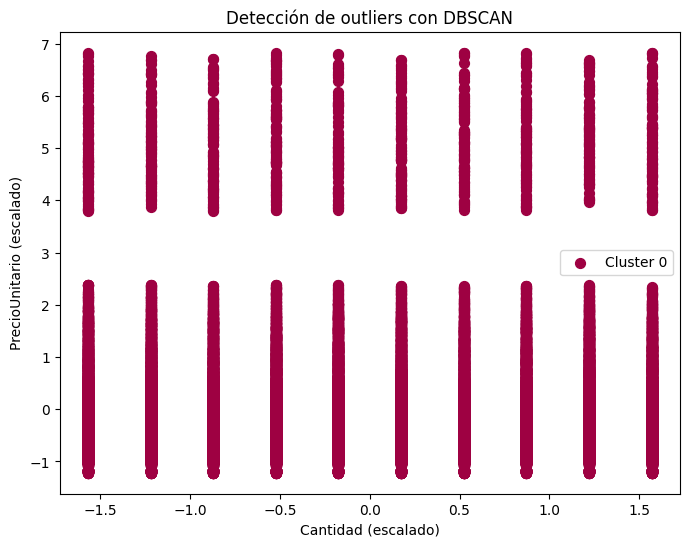

In [7]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Seleccionamos las columnas numéricas para DBSCAN
X = df[['Cantidad', 'PrecioUnitario']].values

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=2)
dbscan.fit(X_scaled)

df['DBSCAN_Cluster'] = dbscan.labels_
df['Es_Outlier'] = df['DBSCAN_Cluster'] == -1

# Total outliers
total_outliers = df['Es_Outlier'].sum()
print(f'Total de outliers detectados: {total_outliers}')

# Gráfico
plt.figure(figsize=(8,6))

# Colores para los clusters (incluye outliers)
unique_labels = set(dbscan.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (dbscan.labels_ == k)
    xy = X_scaled[class_member_mask]

    if k == -1:
        # Outliers en rojo y con mayor tamaño
        plt.scatter(xy[:, 0], xy[:, 1], c='red', s=100, label='Outliers')
    else:
        plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=50, label=f'Cluster {k}')

plt.xlabel('Cantidad (escalado)')
plt.ylabel('PrecioUnitario (escalado)')
plt.title('Detección de outliers con DBSCAN')
plt.legend()
plt.show()

**Uso del z-score**

In [8]:
import pandas as pd
import numpy as np

# Columnas numéricas para Z-score
cols_num = ['Cantidad', 'PrecioUnitario']

# Calculamos el Z-score absoluto
z_scores = np.abs((df[cols_num] - df[cols_num].mean()) / df[cols_num].std())

# Detectamos filas con Z-score mayor a 3 en cualquiera de las columnas numéricas
df['Es_Outlier'] = (z_scores > 3).any(axis=1)

# Contamos los outliers detectados
total_outliers = df['Es_Outlier'].sum()

print(f'Total de outliers detectados: {total_outliers}')

# Mostrar filas con el indicador de outlier
print(df[['Producto', 'Cantidad', 'PrecioUnitario', 'Es_Outlier']])

Total de outliers detectados: 984
                              Producto  Cantidad  PrecioUnitario  Es_Outlier
0            Desinfectante Poett 900ml         9            4.87       False
1                 Baterías Duracell AA         9            5.31       False
2                Sal de mesa Lobos 1kg         2            1.46       False
3                    Velas pequeñas x4         9            3.08       False
4      Toallas higiénicas Nosotras x10        10            6.43       False
...                                ...       ...             ...         ...
49995  Crema corporal Nivea Soft 200ml        10           12.43       False
49996        Limpiavidrios Mr. Músculo         1            4.32       False
49997        Bolsas plásticas pequeñas         9            0.34       False
49998              Fideos Don Vittorio         8            3.91       False
49999      Alimento húmedo Felix sobre         5            2.96       False

[50000 rows x 4 columns]


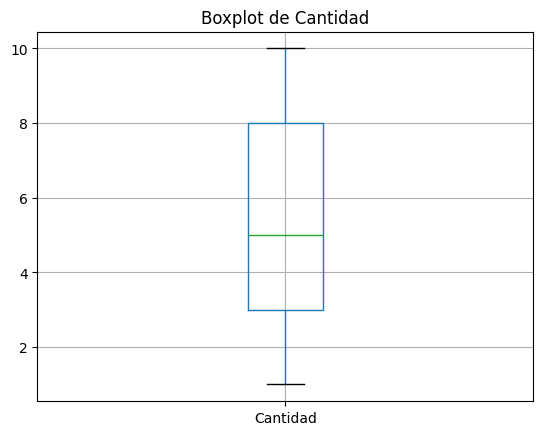

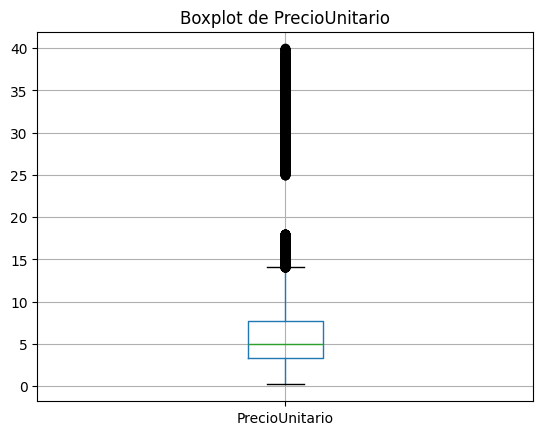

         Fecha                         Producto Categoría  Cantidad  \
41  2022-05-04  Transportadora plástica pequeña  mascotas         8   
56  2022-05-05  Transportadora plástica pequeña  mascotas         2   
68  2022-05-05  Transportadora plástica pequeña  mascotas        10   
155 2022-05-07  Transportadora plástica pequeña  mascotas         4   
190 2022-05-08  Transportadora plástica pequeña  mascotas         4   
211 2022-05-09  Transportadora plástica pequeña  mascotas         6   
232 2022-05-09             Vino Intipalka 750ml   bebidas        10   
242 2022-05-09  Transportadora plástica pequeña  mascotas         8   
283 2022-05-10  Transportadora plástica pequeña  mascotas         4   
297 2022-05-10  Transportadora plástica pequeña  mascotas         9   

     PrecioUnitario  PrecioTotal          MétodoPago   Año  Mes  \
41            29.36       234.88       Transferencia  2022    5   
56            26.08        52.16            Efectivo  2022    5   
68            39.

In [9]:
#Grafico
import matplotlib.pyplot as plt

for col in ['Cantidad', 'PrecioUnitario']:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Boxplot de {col}')
    plt.show()

print(df[df['Es_Outlier']].head(10))

In [10]:
#Usamos z score luego de escalar
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Columnas a escalar
cols_num = ['Cantidad', 'PrecioUnitario']

# Crear el escalador
scaler = MinMaxScaler()

# Escalar las columnas (retorna un numpy array)
df_scaled = scaler.fit_transform(df[cols_num])

# Convertir a DataFrame para manipular mejor
df_scaled = pd.DataFrame(df_scaled, columns=cols_num)

# Calcular Z-score sobre las columnas escaladas
z_scores = np.abs((df_scaled - df_scaled.mean()) / df_scaled.std())

# Detectar outliers (Z-score > 3)
df['Es_Outlier'] = (z_scores > 3).any(axis=1)

# Contar outliers detectados
total_outliers = df['Es_Outlier'].sum()

print(f'Total de outliers detectados tras escalar y aplicar Z-score: {total_outliers}')

# Opcional: mostrar filas con outliers
print(df[df['Es_Outlier']])

Total de outliers detectados tras escalar y aplicar Z-score: 984
           Fecha                         Producto Categoría  Cantidad  \
41    2022-05-04  Transportadora plástica pequeña  mascotas         8   
56    2022-05-05  Transportadora plástica pequeña  mascotas         2   
68    2022-05-05  Transportadora plástica pequeña  mascotas        10   
155   2022-05-07  Transportadora plástica pequeña  mascotas         4   
190   2022-05-08  Transportadora plástica pequeña  mascotas         4   
...          ...                              ...       ...       ...   
49681 2025-04-22  Transportadora plástica pequeña  mascotas         4   
49788 2025-04-25  Transportadora plástica pequeña  mascotas         4   
49831 2025-04-26  Transportadora plástica pequeña  mascotas         9   
49873 2025-04-27  Transportadora plástica pequeña  mascotas         2   
49975 2025-04-29             Vino Intipalka 750ml   bebidas         9   

       PrecioUnitario  PrecioTotal          MétodoPago   A

# **Reporte de productos**

In [11]:
# visualizar todos los productos existentes en el dataframe
df['Producto'].unique()

array(['Desinfectante Poett 900ml', 'Baterías Duracell AA',
       'Sal de mesa Lobos 1kg', 'Velas pequeñas x4',
       'Toallas higiénicas Nosotras x10', 'Desodorante Nivea roll-on',
       'Crema corporal Nivea Soft 200ml', 'Gaseosa Coca Cola 2.25L',
       'Alimento húmedo Felix sobre', 'Block de notas adhesivas Post-it',
       'Corrector líquido Liquid Paper', 'Esponjas Scotch-Brite',
       'Bolsas plásticas pequeñas', 'Alimento Whiskas adultos 500g',
       'Gaseosa Pepsi 1.5L', 'Fideos Don Vittorio',
       'Limpiavidrios Mr. Músculo', 'Cargador USB genérico',
       'Regla de 30 cm', 'Resaltador Faber Castell',
       'Collar ajustable para perro', 'Encendedor Bic', 'Jugo Tampico 1L',
       'Plato doble antideslizante', 'Pasta dental Colgate',
       'Borrador Pelikan', "Chocolate caliente Winter's 180g",
       'Fécula de maíz Negrita 400g', 'Harina Blanca Flor 1kg',
       'Cereal Ángel Chocapic 240g', 'Sopa instantánea Maggi',
       'Jugo Cifrut caja 1L', 'Shampoo Sedal 4

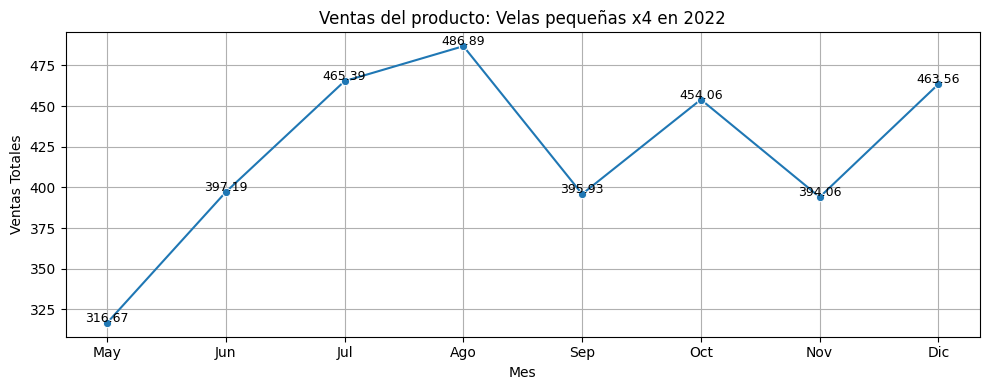

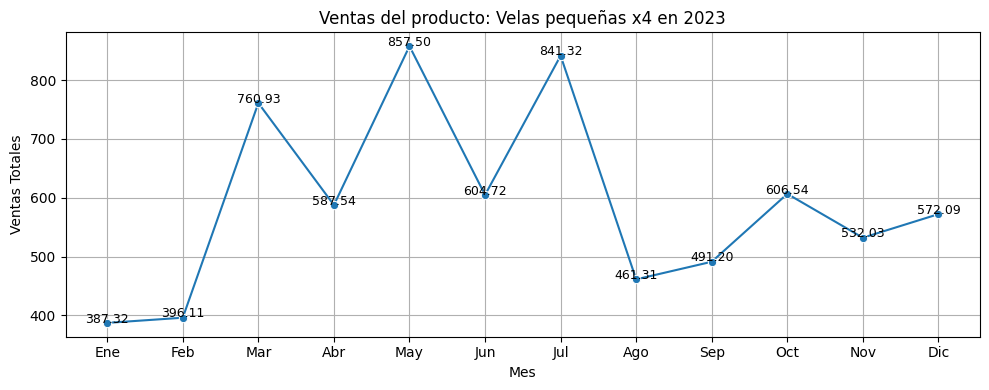

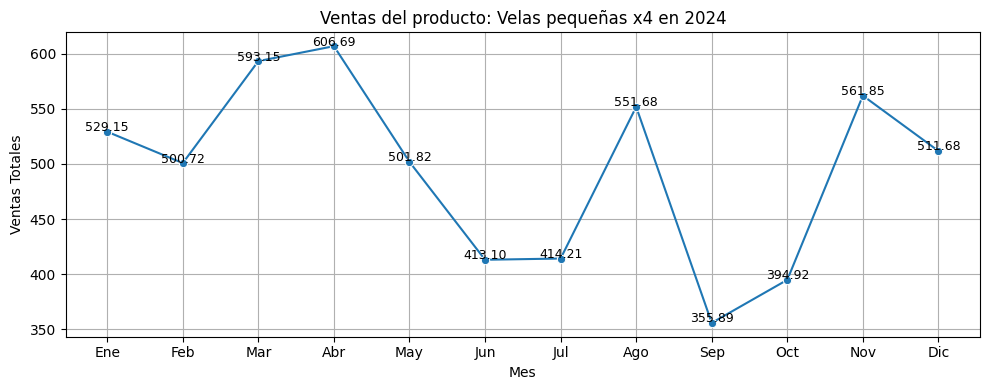

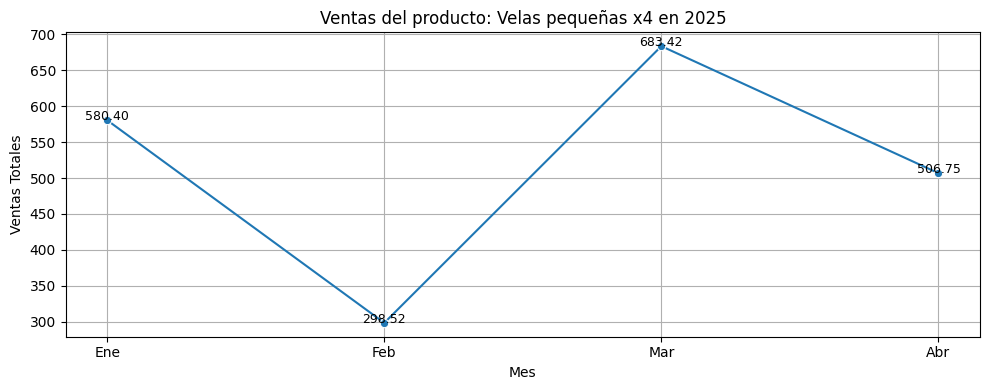

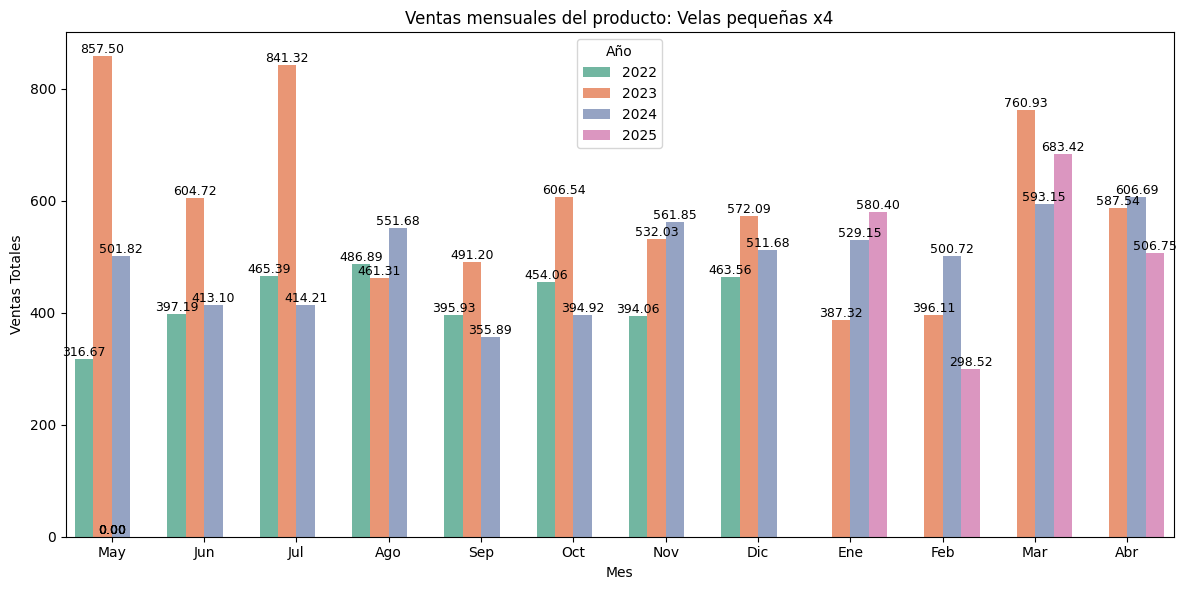

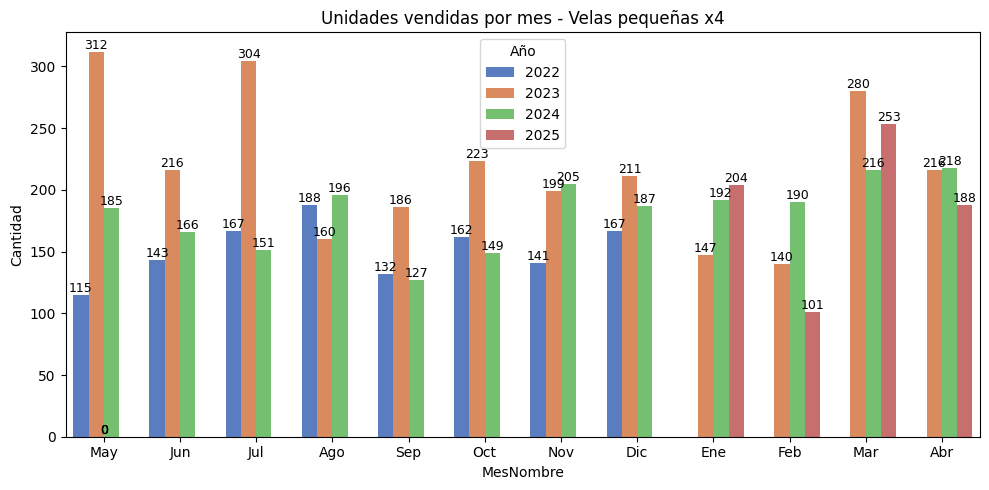

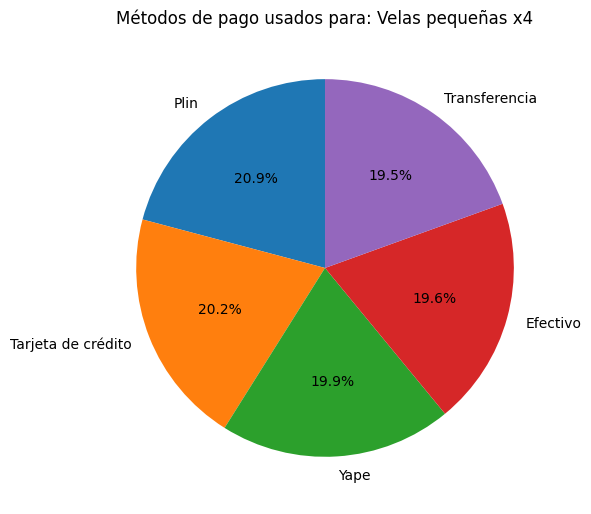


Resumen del producto: Velas pequeñas x4
Ventas totales:  18476.31
Unidades vendidas:  6737
Precio unitario promedio:  2.74
Primera venta: 2022-05-04
Última venta: 2025-04-28
Reporte generado


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mapeo de número a mes abreviado
meses_abrev = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}

def reporte_ventas_producto(df):
    # Ingreso del nombre del producto
    nombre_producto = input("Ingrese el nombre del producto: ").strip()

    # Filtrado del producto
    df_producto = df[df['Producto'].str.lower() == nombre_producto.lower()]

    if df_producto.empty:
        print(f"No se encontraron ventas para el producto: {nombre_producto}")
        return

    # Agrupar por año y mes
    resumen = df_producto.groupby(['Año', 'Mes'])['PrecioTotal'].sum().reset_index()
    resumen['MesNombre'] = resumen['Mes'].map(meses_abrev)
    resumen = resumen.sort_values(['Año', 'Mes'])

    # ==== Gráfico: Gráfico de líneas por año ====
    años_unicos = resumen['Año'].unique()

    for año in años_unicos:
        datos_año = resumen[resumen['Año'] == año]

        plt.figure(figsize=(10, 4))
        ax = sns.lineplot(data=datos_año, x='MesNombre', y='PrecioTotal', marker='o')

        # Etiquetas sobre cada punto
        for i, row in datos_año.iterrows():
            ax.text(row['MesNombre'], row['PrecioTotal'] + 0.5, f'{row["PrecioTotal"]:.2f}',
                    color='black', ha='center', fontsize=9)

        plt.title(f"Ventas del producto: {nombre_producto} en {año}")
        plt.xlabel("Mes")
        plt.ylabel("Ventas Totales")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # ==== Gráfico: Barras agrupadas por año ====
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=resumen, x='MesNombre', y='PrecioTotal', hue='Año', palette='Set2')

    # Añadir etiquetas numéricas sobre cada barra
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

    plt.title(f"Ventas mensuales del producto: {nombre_producto}")
    plt.xlabel("Mes")
    plt.ylabel("Ventas Totales")
    plt.legend(title='Año')
    plt.tight_layout()
    plt.show()

    #Cantidad total de unidades vendidas por mes y año
    cant_vendida = df_producto.groupby(['Año', 'Mes'])['Cantidad'].sum().reset_index()
    cant_vendida['MesNombre'] = cant_vendida['Mes'].map(meses_abrev)

    plt.figure(figsize=(10, 5))
    sns.barplot(data=cant_vendida, x='MesNombre', y='Cantidad', hue='Año', palette='muted')

    for p in plt.gca().patches:
        plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=9)

    plt.title(f"Unidades vendidas por mes - {nombre_producto}")
    plt.ylabel("Cantidad")
    plt.tight_layout()
    plt.show()

    #Distribución de métodos de pago para ese producto
    plt.figure(figsize=(6, 6))
    df_producto['MétodoPago'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f"Métodos de pago usados para: {nombre_producto}")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

    #Resumen estadístico del producto
    print(f"\nResumen del producto: {nombre_producto}")
    print("Ventas totales: ", round(df_producto['PrecioTotal'].sum(), 2))
    print("Unidades vendidas: ", int(df_producto['Cantidad'].sum()))
    print("Precio unitario promedio: ", round(df_producto['PrecioUnitario'].mean(), 2))
    print("Primera venta:", df_producto['Fecha'].min().date())
    print("Última venta:", df_producto['Fecha'].max().date())

# Ejecutar función
reporte_ventas_producto(df)

print("Reporte generado")

# **Módulo 1**

# **Predicción de Ventas Futuras**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Codificación de variables categóricas
df["ProductoCod"] = df["Producto"].astype("category").cat.codes
df["CategoriaCod"] = df["Categoría"].astype("category").cat.codes

X = df[["ProductoCod", "CategoriaCod", "Mes", "PrecioUnitario", "Año"]]
y = df["PrecioTotal"]

# Entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos

modelos = {
"LinearRegression": LinearRegression(),
"DecisionTree": DecisionTreeRegressor(random_state=42),
"RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
}

def evaluar_modelo(nombre, modelo):
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)

    print(f"\nModelo: {nombre}")
    print(f" MAE: {mae:.2f}")
    print(f" RMSE: {rmse:.2f}")
    print(f" R²: {r2:.2f}")

for nombre, modelo in modelos.items():
    evaluar_modelo(nombre, modelo)


Modelo: LinearRegression
 MAE: 15.25
 RMSE: 22.11
 R²: 0.59

Modelo: DecisionTree
 MAE: 20.78
 RMSE: 32.26
 R²: 0.12

Modelo: RandomForest
 MAE: 15.94
 RMSE: 23.88
 R²: 0.52


**Reporte de Ventas**

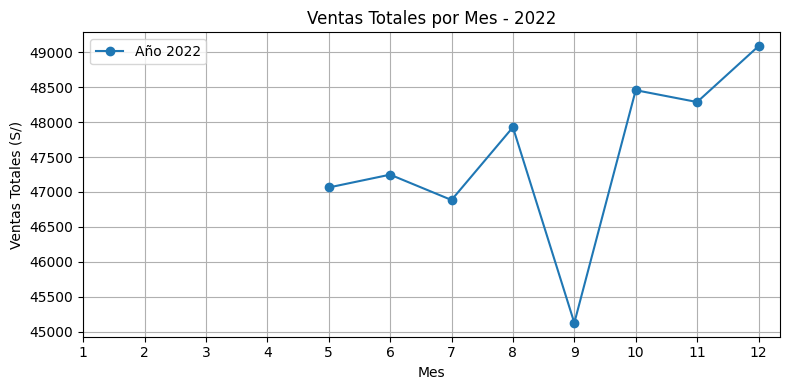

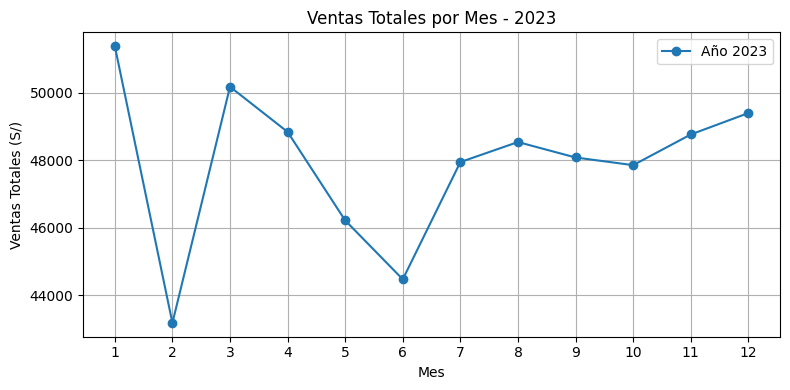

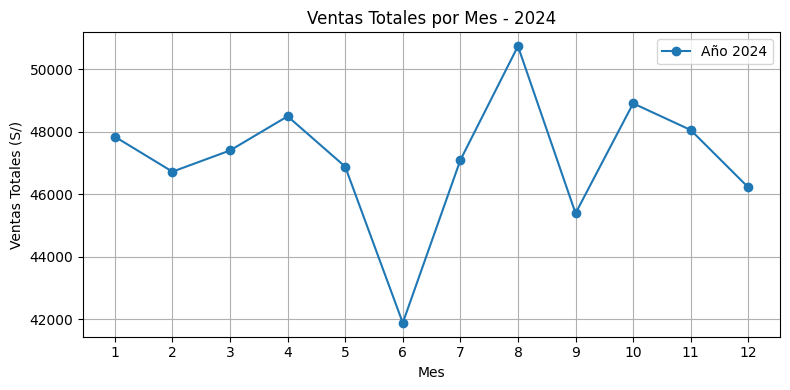

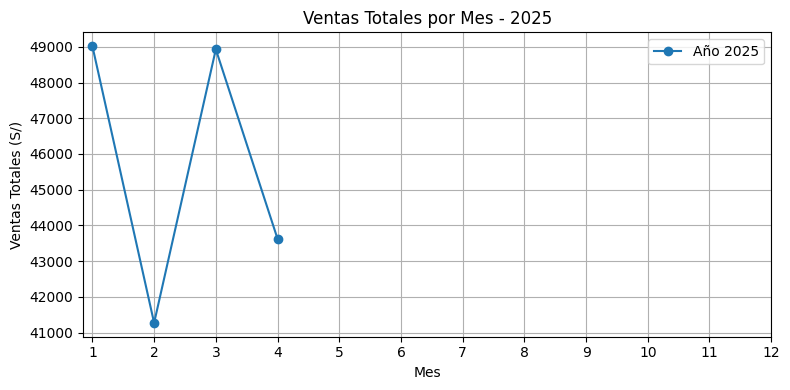

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por año y mes y sumar PrecioTotal
ventas_mensuales = df.groupby(["Año", "Mes"])["PrecioTotal"].sum().reset_index()

# Crear columna de fecha para visualización
ventas_mensuales["Fecha"] = pd.to_datetime(ventas_mensuales["Año"].astype(str) + "-" + ventas_mensuales["Mes"].astype(str) + "-01")

# Obtener los años únicos
años = ventas_mensuales["Año"].unique()

# Crear un gráfico por año
for año in años:
    datos_año = ventas_mensuales[ventas_mensuales["Año"] == año]

    plt.figure(figsize=(8, 4))
    plt.plot(datos_año["Mes"], datos_año["PrecioTotal"], marker="o", label=f"Año {año}")
    plt.title(f"Ventas Totales por Mes - {año}")
    plt.xlabel("Mes")
    plt.ylabel("Ventas Totales (S/)")
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

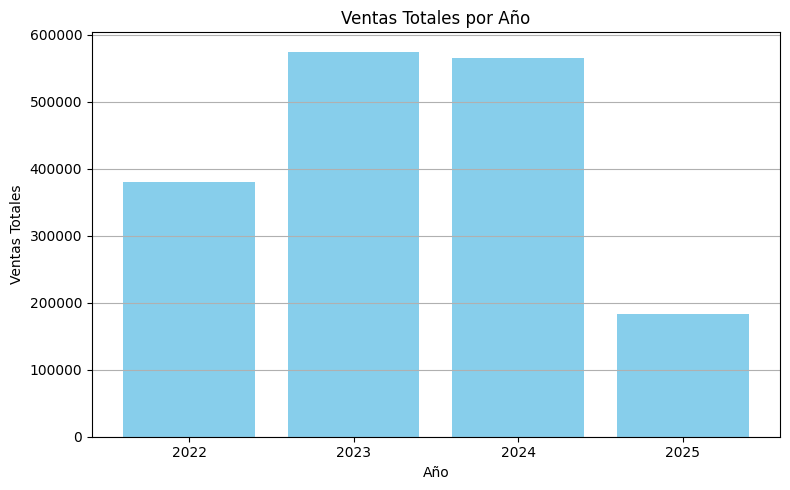

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por año y sumar PrecioTotal
ventas_anuales = df.groupby("Año")["PrecioTotal"].sum().reset_index()

# Graficar ventas totales por año
plt.figure(figsize=(8,5))
plt.bar(ventas_anuales["Año"].astype(str), ventas_anuales["PrecioTotal"], color='skyblue')
plt.title("Ventas Totales por Año")
plt.xlabel("Año")
plt.ylabel("Ventas Totales")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Gráfico de Predicción con Regresión Lineal**

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


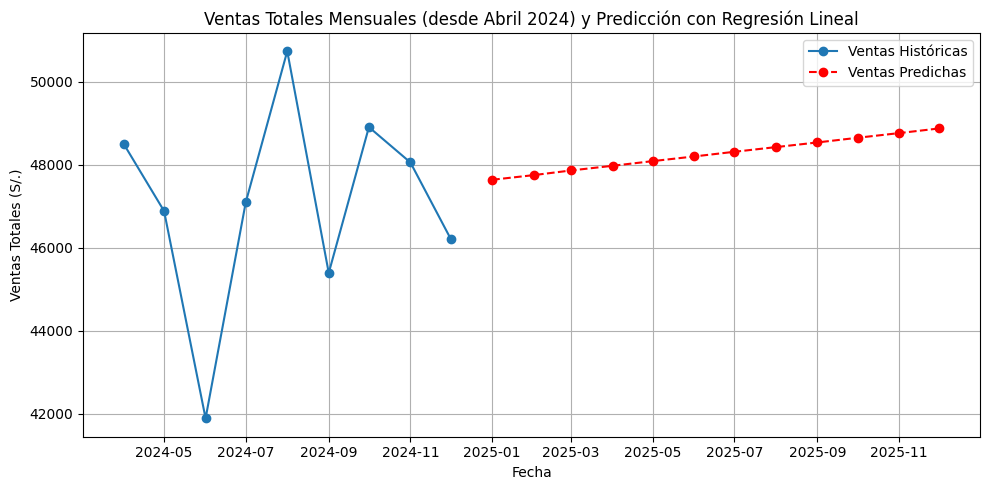

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Filtrar datos desde abril 2024 en adelante
ventas_filtradas = df[(df["Año"] == 2024) & (df["Mes"] >= 4)]

# 2. Agrupar ventas totales por mes
ventas_mensuales = ventas_filtradas.groupby(["Año", "Mes"])["PrecioTotal"].sum().reset_index()

# 3. Ordenar y crear índice temporal t (1,2,3,...)
ventas_mensuales = ventas_mensuales.sort_values(by=["Año", "Mes"]).reset_index(drop=True)
ventas_mensuales["t"] = np.arange(1, len(ventas_mensuales) + 1)

# 4. Ajustar modelo de regresión lineal usando t
X = ventas_mensuales[["t"]]
y = ventas_mensuales["PrecioTotal"]

modelo = LinearRegression()
modelo.fit(X, y)

# 5. Predecir ventas para los próximos meses (ejemplo: 12 meses)
n_meses_futuros = 12
t_futuro = np.arange(len(ventas_mensuales) + 1, len(ventas_mensuales) + n_meses_futuros + 1).reshape(-1, 1)
ventas_predichas = modelo.predict(t_futuro)

# 6. Crear fechas futuras para graficar
ultimo_mes = ventas_mensuales.loc[len(ventas_mensuales)-1, "Mes"]
ultimo_año = ventas_mensuales.loc[len(ventas_mensuales)-1, "Año"]

fechas_futuras = []
mes = ultimo_mes
año = ultimo_año
for _ in range(n_meses_futuros):
    mes += 1
    if mes > 12:
        mes = 1
        año += 1
    fechas_futuras.append(pd.Timestamp(year=año, month=mes, day=1))
fechas_futuras = pd.Series(fechas_futuras)

# 7. Crear DataFrame con predicciones
df_prediccion = pd.DataFrame({
    "Fecha": fechas_futuras,
    "VentasPredichas": ventas_predichas
})

# 8. Graficar ventas históricas y predicciones
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(ventas_mensuales["Año"].astype(str) + "-" + ventas_mensuales["Mes"].astype(str) + "-01"), ventas_mensuales["PrecioTotal"], marker='o', label="Ventas Históricas")
plt.plot(df_prediccion["Fecha"], df_prediccion["VentasPredichas"], marker='o', linestyle='--', color='red', label="Ventas Predichas")
plt.title("Ventas Totales Mensuales (desde Abril 2024) y Predicción con Regresión Lineal")
plt.xlabel("Fecha")
plt.ylabel("Ventas Totales (S/.)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Módulo 2**

# **Predicir stock - producto nuevo**


--- Métricas del modelo ---
MAE: 18.52
RMSE: 24.20
R²: 0.55


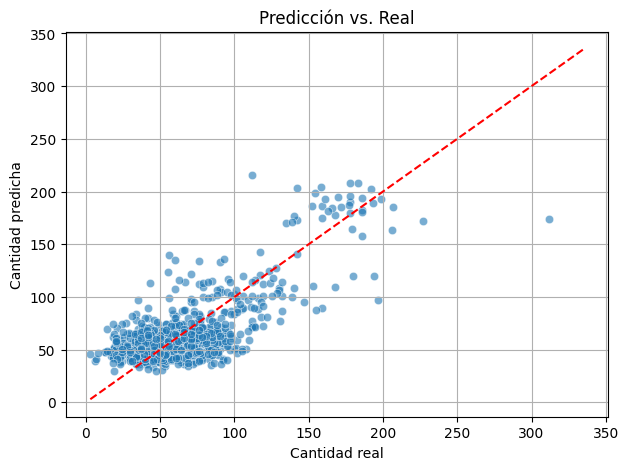


Stock recomendado para 'coronita': 46 unidades


In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# --- Cargar y preparar datos ---
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Año'] = df['Fecha'].dt.year
df['Mes_num'] = df['Fecha'].dt.month
df['Trimestre'] = df['Fecha'].dt.quarter

# Codificar la categoría
le_cat = LabelEncoder()
df['Categoria_encoded'] = le_cat.fit_transform(df['Categoría'])

# Agrupar por mes, producto, etc.
df_grouped = df.groupby(['Producto', 'Categoria_encoded', 'Año', 'Mes_num', 'Trimestre']).agg({
    'Cantidad': 'sum',
    'PrecioUnitario': 'mean'
}).reset_index()

# Agregar feature: precio promedio por categoría (ayuda al modelo)
cat_price_avg = df_grouped.groupby('Categoria_encoded')['PrecioUnitario'].transform('mean')
df_grouped['Precio_relativo'] = df_grouped['PrecioUnitario'] / cat_price_avg

# Variables para el modelo
features = ['Categoria_encoded', 'PrecioUnitario', 'Precio_relativo', 'Mes_num', 'Trimestre']
X = df_grouped[features]
y = df_grouped['Cantidad']

# División para evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo con parámetros ajustados (puedes probar otros)
model = RandomForestRegressor(n_estimators=300, max_depth=25, min_samples_split=4, random_state=42)
model.fit(X_train, y_train)

# --- Evaluación del modelo ---
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print("\n--- Métricas del modelo ---")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# --- Gráfico: comparación de valores reales vs predichos ---
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Cantidad real")
plt.ylabel("Cantidad predicha")
plt.title("Predicción vs. Real")
plt.grid(True)
plt.show()

# --- Función para validar coherencia mes-trimestre ---
def validar_trimestre_mes(mes, trimestre):
    trimestre_calculado = ((mes - 1) // 3) + 1
    if trimestre != trimestre_calculado:
        raise ValueError(f"Trimestre {trimestre} no corresponde al mes {mes} (debería ser {trimestre_calculado}).")

# --- Función para predecir stock producto nuevo ---
def predecir_stock_producto_nuevo(categoria, precio_unitario, mes, trimestre):
    # Validar categoría
    if categoria not in le_cat.classes_:
        raise ValueError("Categoría no reconocida. Usa una categoría ya existente.")

    # Validar coherencia mes-trimestre
    validar_trimestre_mes(mes, trimestre)

    categoria_encoded = le_cat.transform([categoria])[0]
    cat_price_prom = df_grouped[df_grouped['Categoria_encoded'] == categoria_encoded]['PrecioUnitario'].mean()
    precio_relativo = precio_unitario / cat_price_prom if cat_price_prom > 0 else 1.0

    X_new = pd.DataFrame({
        'Categoria_encoded': [categoria_encoded],
        'PrecioUnitario': [precio_unitario],
        'Precio_relativo': [precio_relativo],
        'Mes_num': [mes],
        'Trimestre': [trimestre]
    })

    pred = model.predict(X_new)[0]
    return max(round(pred), 0)

#========================
# --- Ejemplo de uso ---
#========================
nombre_producto = "coronita"
categoria_nueva = "bebidas"
precio_unitario_nuevo = 3
mes_pred = 6
trimestre_pred = 2

stock_recomendado = predecir_stock_producto_nuevo(categoria_nueva, precio_unitario_nuevo, mes_pred, trimestre_pred)
print(f"\nStock recomendado para '{nombre_producto}': {stock_recomendado} unidades")

# **Módulo 3**

# **Evaluación de rentabilidad**

Rentabilidad promedio por cluster:
         count         mean          std         min         25%          50%  \
cluster                                                                         
0         21.0  1486.454993   783.633161  391.813726  948.610619  1598.031473   
1          6.0  1245.024867   494.011965  586.383653  874.775392  1359.822129   
2         10.0  1227.179418  1151.659925  124.986424  376.910539   647.797955   
3         74.0  1436.522058   885.191932   66.290246  640.212177  1427.573433   

                 75%          max  
cluster                            
0        2004.440739  2898.614498  
1        1537.002110  1854.966039  
2        2314.673230  2961.316463  
3        2207.621153  2911.234064  

Cluster 0 - 21 productos:
['Block de notas adhesivas Post-it', 'Borrador Pelikan', 'Carpeta A4 con broche', 'Cartuchera básica', 'Compás escolar', 'Corrector líquido Liquid Paper', 'Cuaderno Norma 100 hojas', 'Desodorante Axe', 'Detergente Ariel 1kg', 'Goma en 

C:\Users\HP\AppData\Local\Temp\ipykernel_18776\2527106208.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(rent_summary))


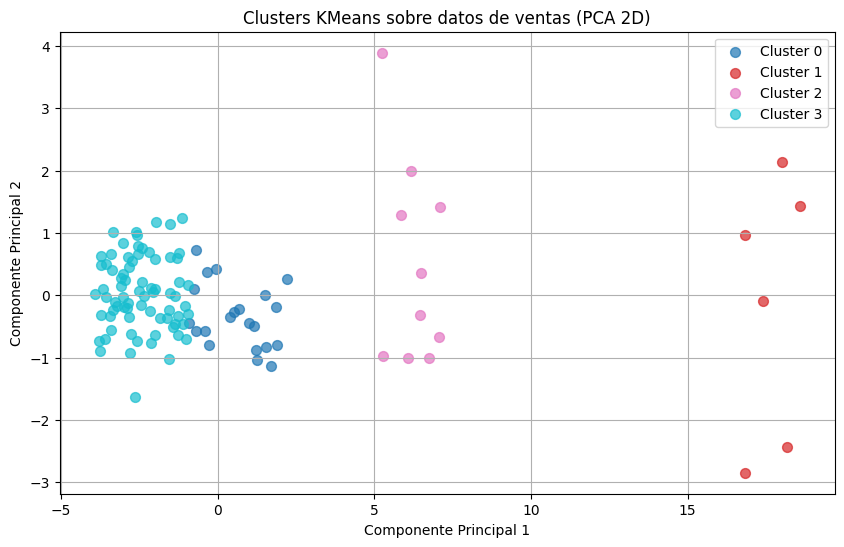

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Preparar datos
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Mes'] = df['Fecha'].dt.to_period('M')
df_agg = df.groupby(['Producto', 'Mes'])['Cantidad'].sum().reset_index()

# Pivoteo: productos en filas, meses en columnas
df_pivot = df_agg.pivot(index='Producto', columns='Mes', values='Cantidad').fillna(0)

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pivot)

# KMeans (ajusta n_clusters según convenga)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_pivot['cluster'] = clusters

# Simular DataFrame con rentabilidad por producto (ejemplo)
# Aquí debes usar tu DataFrame original con rentabilidad real
# Para ejemplo, generamos una rentabilidad aleatoria
import numpy as np
np.random.seed(42)
rentabilidad = pd.DataFrame({
    'Producto': df_pivot.index,
    'Rentabilidad': np.random.uniform(50, 3000, len(df_pivot))
}).set_index('Producto')

# Unimos rentabilidad y clusters
df_pivot = df_pivot.join(rentabilidad)

# Agrupación resumen rentabilidad
rent_summary = df_pivot.groupby('cluster')['Rentabilidad'].describe()
print("Rentabilidad promedio por cluster:")
print(rent_summary)

# Listar productos por cluster
for c in sorted(df_pivot['cluster'].unique()):
    productos_cluster = df_pivot[df_pivot['cluster'] == c].index.tolist()
    print(f"\nCluster {c} - {len(productos_cluster)} productos:")
    print(productos_cluster)

# PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap('tab10', len(rent_summary))

for i, c in enumerate(sorted(df_pivot['cluster'].unique())):
    mask = df_pivot['cluster'] == c
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], s=50, alpha=0.7, color=colors(i), label=f'Cluster {c}')

plt.title('Clusters KMeans sobre datos de ventas (PCA 2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

# **Módulo 4**

# **Análisis de cesta de compra**

**Preparación de datos**

In [19]:
# !!pip install mlxtend pandas numpy scikit-learn
# !pip install mlxtend -q

In [20]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Mes'] = df['Fecha'].dt.to_period('M')

# Crear transacciones (productos comprados el mismo día)
transactions = df.groupby('Fecha')['Producto'].apply(list).reset_index()
transactions['Mes'] = pd.to_datetime(transactions['Fecha']).dt.to_period('M')

print(f"Datos cargados: {len(df)} registros")
print(f"Transacciones: {len(transactions)} días de compra")

Datos cargados: 50000 registros
Transacciones: 1092 días de compra


In [21]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

# Convertir columna Fecha a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Filtrar solo datos del año 2024
df = df[df['Fecha'].dt.year == 2024].copy()

if df.empty:
    print("No hay datos disponibles del año 2024.")
else:
    print(f"Datos cargados: {len(df)} registros del año 2024")

    # Extraer el mes y nombre del mes
    df['Mes'] = df['Fecha'].dt.to_period('M')
    df['MesNombre'] = df['Fecha'].dt.month

    meses_nombres = {
        1: 'enero', 2: 'febrero', 3: 'marzo', 4: 'abril',
        5: 'mayo', 6: 'junio', 7: 'julio', 8: 'agosto',
        9: 'septiembre', 10: 'octubre', 11: 'noviembre', 12: 'diciembre'
    }

    # Mostrar meses disponibles
    print("\nMESES DISPONIBLES (2024):")
    meses_con_datos = sorted(df['MesNombre'].unique())
    for mes_num in meses_con_datos:
        print(f"- {meses_nombres[mes_num]}")

    # Pedir entrada del usuario
    print("\nIngrese el mes que desea analizar (escriba el nombre completo):")
    mes_input = input().strip().lower()

    # Convertir nombre de mes a número
    mes_numero = next((num for num, nombre in meses_nombres.items()
                       if nombre == mes_input), None)

    if mes_numero is None or mes_numero not in meses_con_datos:
        print("Mes no válido o sin datos disponibles.")
    else:
        datos_mes = df[df['MesNombre'] == mes_numero]

        # Crear lista de transacciones por día
        transacciones_mes = datos_mes.groupby('Fecha')['Producto'].apply(list).tolist()

        print(f"\nANALIZANDO: {meses_nombres[mes_numero].upper()} 2024")
        print(f"Transacciones encontradas: {len(transacciones_mes)}")
        print("="*40)

        if len(transacciones_mes) < 3:
            print("Pocas transacciones para generar promociones.")
        else:
            # Codificar las transacciones
            te = TransactionEncoder()
            te_ary = te.fit(transacciones_mes).transform(transacciones_mes)
            df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

            # Calcular soporte mínimo dinámico
            min_support = max(0.2, 2 / len(transacciones_mes))
            frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

            if frequent_itemsets.empty:
                print("No se encontraron patrones frecuentes de compra.")
            else:
                # Reglas de asociación
                rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

                # Filtrar reglas no triviales (evitar confianza 100% si hay pocas)
                rules = rules[rules['confidence'] < 1.0]

                if rules.empty:
                    print("No se generaron promociones relevantes.")
                else:
                    # Mostrar top 3 reglas
                    top_rules = rules.sort_values('confidence', ascending=False).head(3)

                    print("PROMOCIONES RECOMENDADAS:")
                    for i, (_, rule) in enumerate(top_rules.iterrows(), 1):
                        producto_base = ', '.join(rule['antecedents'])
                        producto_promocion = ', '.join(rule['consequents'])
                        confianza = round(rule['confidence'] * 100, 1)
                        print(f"{i}. Compra '{producto_base}' y lleva '{producto_promocion}' (confianza: {confianza}%)")

Datos cargados: 16568 registros del año 2024

MESES DISPONIBLES (2024):
- enero
- febrero
- marzo
- abril
- mayo
- junio
- julio
- agosto
- septiembre
- octubre
- noviembre
- diciembre

Ingrese el mes que desea analizar (escriba el nombre completo):

ANALIZANDO: ENERO 2024
Transacciones encontradas: 31
PROMOCIONES RECOMENDADAS:
1. Compra 'Toalla de papel Elite x2, Encendedor Bic' y lleva 'Bolsas plásticas pequeñas' (confianza: 92.3%)
2. Compra 'Carpeta A4 con broche' y lleva 'Encendedor Bic' (confianza: 92.3%)
3. Compra 'Bolsas plásticas pequeñas, Toalla de papel Elite x2' y lleva 'Encendedor Bic' (confianza: 92.3%)


# **Módulo 5**

# **Predicción stock de producto existente**

In [ ]:
#Prediccion de stock de producto existente
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import sklearn
from packaging import version

# 1. Agrupar datos por Producto y Mes
df_grouped = df.groupby(['Producto', 'Mes']).agg({
    'Cantidad': 'sum',
    'PrecioUnitario': 'mean',
    'PrecioTotal': 'sum',
    'Categoría': 'first',
    'MétodoPago': 'first'
}).reset_index()

# Transformar la variable objetivo (Cantidad)
df_grouped['CantidadLog'] = np.log1p(df_grouped['Cantidad'])

# 2. Preparar features (X) y target (y)
features = df_grouped[['Producto', 'Mes', 'Categoría', 'MétodoPago']]
features['PrecioUnitario'] = df_grouped['PrecioUnitario']
features['PrecioTotal'] = df_grouped['PrecioTotal']
target = df_grouped['CantidadLog']

# Codificar variables categóricas con compatibilidad sklearn
if version.parse(sklearn.__version__) >= version.parse("1.2"):
    encoder = OneHotEncoder(sparse_output=False)
else:
    encoder = OneHotEncoder(sparse=False)

encoded = encoder.fit_transform(features[['Producto', 'Categoría', 'MétodoPago']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

X = pd.concat([encoded_df, features[['Mes', 'PrecioUnitario', 'PrecioTotal']].reset_index(drop=True)], axis=1)
y = target.values

# 3. División entrenamiento / prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Modelo Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Función para predecir stock
def predecir_stock(producto, mes):
    if producto not in df_grouped['Producto'].values:
        print(f"Producto '{producto}' no encontrado.")
        return

    fila = df_grouped[df_grouped['Producto'] == producto].iloc[0]

    prod_df = pd.DataFrame({
        'Producto': [producto],
        'Categoría': [fila['Categoría']],
        'MétodoPago': [fila['MétodoPago']],
        'Mes': [mes],
        'PrecioUnitario': [fila['PrecioUnitario']],
        'PrecioTotal': [fila['PrecioTotal']],
    })

    encoded_input = encoder.transform(prod_df[['Producto', 'Categoría', 'MétodoPago']])
    encoded_input_df = pd.DataFrame(encoded_input, columns=encoder.get_feature_names_out())
    input_data = pd.concat([encoded_input_df, prod_df[['Mes', 'PrecioUnitario', 'PrecioTotal']].reset_index(drop=True)], axis=1)

    pred_log = model.predict(input_data)[0]
    pred = np.expm1(pred_log)
    print(f"\nStock recomendado para '{producto}' en mes {mes}: {round(pred)} unidades")

# 6. Mostrar productos y pedir entrada
print("\nProductos disponibles para predicción:")
for p in sorted(df_grouped['Producto'].unique()):
    print("-", p)

producto_input = input("\nIngresa el nombre del producto tal como aparece en la lista: ")
mes_input = int(input("Ingresa el número del mes (1-12): "))

predecir_stock(producto_input, mes_input)

# 7. Evaluación y gráficos después de la predicción

y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_exp = np.expm1(y_test)

mae = mean_absolute_error(y_test_exp, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred))
r2 = r2_score(y_test_exp, y_pred)

print("\n Evaluación del modelo:")
print(f" MAE  (error absoluto medio): {mae:.2f}")
print(f" RMSE (raíz del error cuadrático medio): {rmse:.2f}")
print(f" R²   (coef. de determinación): {r2:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_exp, y_pred, alpha=0.6, color='navy')
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'r--')
plt.xlabel("Cantidad Real")
plt.ylabel("Cantidad Predicha")
plt.title("Predicción vs Real (Random Forest)")
plt.grid(True)
plt.show()

errores = y_test_exp - y_pred
plt.figure(figsize=(8, 4))
plt.hist(errores, bins=20, color='purple', edgecolor='black')
plt.title("Distribución del error (residuos)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()